In [1]:
import os
if os.getcwd().endswith('/notebook'):
    os.chdir('..')

In [9]:
import ontonotes
from ontonotes import ontonotes_en, OntonotesDocument

In [10]:
import sys
def print_conllx(deps, file=sys.stdout):
    ''' 
    Convert from my custom representation back to CoNLL-X format.
    This is useful for visualization using Arne Köhn's jupyter-annodoc.
    '''
    table = [(i+1, d['token'], '_', d['pos'], d['pos'], '_', d['head']+1, d['label'], '_', '_')
             for i, d in enumerate(deps)]
    print('\n'.join('\t'.join(str(val) for val in row) 
                    for row in table))
    print()

In [38]:
num_total = len(ontonotes.list_docs(ontonotes_en))
print("Number of OntoNotes documents:", num_total)

Number of OntoNotes documents: 13108


In [40]:
coref_files = [p + '.coref' for p in ontonotes.list_docs(ontonotes_en)]
num_coref = sum(1 for p in coref_files if os.path.exists(p))
print("With coreference data: %d (%.1f%%)" %(num_coref, 100*num_coref/num_total))

With coreference data: 2384 (18.2%)


In [53]:
def find_common_noun(doc, head_sent, head_tok):
    my_token = doc.deps()[head_sent][head_tok]['token']
    if doc.deps()[head_sent][head_tok]['pos'].startswith('NNP'):
        my_token = '<NAME>'
        head_loc = (head_sent, head_tok)
        if head_loc in doc.coref():
            coref_toks = [doc.deps()[sent][tok] for sent, tok in doc.coref()[head_loc]]
            common_noun = [t['token'] for t in coref_toks if t['pos'] in ('NN', 'NNS')]
            pronouns = [t['token'] for t in coref_toks if t['pos'].startswith('PRP')]
            return (common_noun + pronouns + [my_token])[0]
    return my_token

In [85]:
import sys
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
triples = []
for doc_path in tqdm(ontonotes.list_docs(ontonotes_en)):
    doc = OntonotesDocument(doc_path)
    for sent, sent_deps in enumerate(doc.deps()):
        dobjs = [(i, d) for i, d in enumerate(sent_deps) 
                 if d['label'] == 'dobj' and 
                 d['pos'].startswith('N') and 
                 d['token'] != '%']
        for dobj_idx, dobj in dobjs:
            verb_index = dobj['head']
            verb = sent_deps[verb_index]
            sbjs = [(i, d) for i, d in enumerate(sent_deps) 
                    if d['head'] == verb_index and
                    d['pos'].startswith('N') and
                    d['token'] != '%' and
                    d['label'] in ('nsubj', 'nsubjpass', 'xsubj', 'subj')]
            for sbj_idx, sbj in sbjs:
                sbj_lemma = lemmatizer.lemmatize(find_common_noun(doc, sent, sbj_idx).lower(), pos='n')
                verb_lemma = lemmatizer.lemmatize(verb['token'].lower(), pos='v')
                dobj_lemma = lemmatizer.lemmatize(find_common_noun(doc, sent, dobj_idx).lower(), pos='n')
                triples.append((sbj_lemma, verb_lemma, dobj_lemma))

  0%|          | 7/13108 [00:00<17:15, 12.65it/s]<coref> head not found for "Wal - Mart" in sentence 73, file data/ontonotes-release-5.0/data/files/data/english/annotations/bc/cnn/00/cnn_0001.coref
<coref> head not found for "A Democrat from Nebraska a state that went Bush in oh four Nelson" in sentence 374, file data/ontonotes-release-5.0/data/files/data/english/annotations/bc/cnn/00/cnn_0001.coref
  0%|          | 10/13108 [00:01<23:40,  9.22it/s]<coref> head not found for "and Wade" in sentence 185, file data/ontonotes-release-5.0/data/files/data/english/annotations/bc/cnn/00/cnn_0004.coref
<coref> head not found for "Dick Cheney" in sentence 198, file data/ontonotes-release-5.0/data/files/data/english/annotations/bc/cnn/00/cnn_0004.coref
  0%|          | 18/13108 [00:02<27:38,  7.89it/s]<coref> head not found for "the old liberal who really came through during the Cuban Missile Crisis because everybody in the world believed he was n't a hawk" in sentence 222, file data/ontonotes-re

  1%|          | 108/13108 [00:03<07:49, 27.68it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/bc/p2.5_c2e/00/p2.5_c2e_0044.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/bc/p2.5_c2e/00/p2.5_c2e_0045.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/bc/p2.5_c2e/00/p2.5_c2e_0048.coref, assume no coreference.
  1%|          | 118/13108 [00:04<07:21, 29.45it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/bc/p2.5_c2e/00/p2.5_c2e_0057.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/bc/p2.5_c2e/00/p2.5_c2e_0058.coref, assume no coreference.
  1%|          | 128/13108 [00:04<07:00, 30.89it/s]<coref> head not found for "Seismology Bureau" in sentence 7, file data/ontonotes-release-5.0/data/files/data/english/annotations/bc/phoenix/00/phoenix_0002.

File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/bn/p2.5_c2e/00/p2.5_c2e_0027.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/bn/p2.5_c2e/00/p2.5_c2e_0028.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/bn/p2.5_c2e/00/p2.5_c2e_0031.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/bn/p2.5_c2e/00/p2.5_c2e_0032.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/bn/p2.5_c2e/00/p2.5_c2e_0033.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/bn/p2.5_c2e/00/p2.5_c2e_0035.coref, assume no coreference.
  6%|▌         | 778/13108 [00:07<01:58, 104.41it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/bn/p2.5_c2e/00/p2.5_c2e_0036.coref, assum

<coref> head not found for "the Sogo in Taipei" in sentence 13, file data/ontonotes-release-5.0/data/files/data/english/annotations/mz/sinorama/10/ectb_1057.coref
<coref> head not found for "a florist who often works for the television and entertainment industries" in sentence 68, file data/ontonotes-release-5.0/data/files/data/english/annotations/mz/sinorama/10/ectb_1057.coref
<coref> head not found for "a plumber who runs the Democracy Association" in sentence 36, file data/ontonotes-release-5.0/data/files/data/english/annotations/mz/sinorama/10/ectb_1059.coref
<coref> head not found for "The most important Taiwanese musical master of the last half century , he" in sentence 73, file data/ontonotes-release-5.0/data/files/data/english/annotations/mz/sinorama/10/ectb_1060.coref
<coref> head not found for "Wang 's widow" in sentence 135, file data/ontonotes-release-5.0/data/files/data/english/annotations/mz/sinorama/10/ectb_1063.coref
 10%|▉         | 1254/13108 [00:11<01:51, 106.19it/s]

 10%|█         | 1348/13108 [00:12<01:47, 109.05it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/p2.5_a2e/00/p2.5_a2e_0021.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/p2.5_a2e/00/p2.5_a2e_0022.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/p2.5_a2e/00/p2.5_a2e_0023.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/p2.5_a2e/00/p2.5_a2e_0025.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/p2.5_a2e/00/p2.5_a2e_0027.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/p2.5_a2e/00/p2.5_a2e_0028.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/p2.5_a2e/00/p2.5_a2e_0030.coref, assu

 11%|█▏        | 1479/13108 [00:12<01:39, 116.79it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/00/wsj_0023.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/00/wsj_0024.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/00/wsj_0034.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/00/wsj_0035.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/00/wsj_0036.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/00/wsj_0039.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/00/wsj_0041.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/fil

File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/01/wsj_0180.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/01/wsj_0181.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/01/wsj_0182.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/01/wsj_0183.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/01/wsj_0186.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/01/wsj_0192.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/01/wsj_0193.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/01/wsj_0198.coref,

File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/03/wsj_0304.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/03/wsj_0305.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/03/wsj_0307.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/03/wsj_0309.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/03/wsj_0310.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/03/wsj_0311.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/03/wsj_0314.coref, assume no coreference.
 13%|█▎        | 1710/13108 [00:13<01:32, 123.55it/s]File not found: data/ontonotes-release-5.0/data/fil

File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/04/wsj_0449.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/04/wsj_0450.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/04/wsj_0451.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/04/wsj_0452.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/04/wsj_0453.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/04/wsj_0455.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/04/wsj_0456.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/04/wsj_0458.coref,

File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/05/wsj_0569.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/05/wsj_0571.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/05/wsj_0574.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/05/wsj_0576.coref, assume no coreference.
 14%|█▍        | 1895/13108 [00:15<01:29, 125.16it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/05/wsj_0578.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/05/wsj_0579.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/05/wsj_0580.coref, assume no coreference.
 15%|█▍        | 1909/13108 [00:15<01:29, 124.77it/

File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/07/wsj_0719.coref, assume no coreference.
 15%|█▌        | 2012/13108 [00:16<01:28, 125.75it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/07/wsj_0721.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/07/wsj_0723.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/07/wsj_0727.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/07/wsj_0728.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/07/wsj_0730.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/07/wsj_0731.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/fil

File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/09/wsj_0939.coref, assume no coreference.
 16%|█▌        | 2125/13108 [00:16<01:27, 125.80it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/09/wsj_0941.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/09/wsj_0942.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/09/wsj_0943.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/09/wsj_0944.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/09/wsj_0945.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/09/wsj_0946.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/fil

 19%|█▉        | 2491/13108 [00:20<01:27, 121.84it/s]<coref> head not found for "whose Benson & Hedges cigarette brand" in sentence 0, file data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/14/wsj_1447.coref
<coref> head not found for "post-Oct . 13" in sentence 47, file data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/14/wsj_1453.coref
<coref> head not found for "so far this year" in sentence 22, file data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/14/wsj_1453.coref
<coref> head not found for "New York" in sentence 26, file data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/14/wsj_1455.coref
 19%|█▉        | 2526/13108 [00:20<01:27, 121.55it/s]<coref> head not found for "MGM Grand" in sentence 3, file data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/15/wsj_1503.coref
<coref> head not found for "FT - SE 100" in sentence 38, file data/ontonotes-release-5.0/data/files/data/english/annot

File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/16/wsj_1699.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/17/wsj_1700.coref, assume no coreference.
 20%|██        | 2676/13108 [00:22<01:26, 120.95it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/17/wsj_1704.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/17/wsj_1707.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/17/wsj_1711.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/17/wsj_1712.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/17/wsj_1714.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/fil

File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/18/wsj_1829.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/18/wsj_1830.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/18/wsj_1831.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/18/wsj_1833.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/18/wsj_1834.coref, assume no coreference.
 21%|██        | 2769/13108 [00:22<01:24, 121.97it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/18/wsj_1841.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/18/wsj_1842.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/fil

 22%|██▏       | 2843/13108 [00:23<01:24, 122.03it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/19/wsj_1948.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/19/wsj_1949.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/19/wsj_1951.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/19/wsj_1952.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/19/wsj_1959.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/19/wsj_1962.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/19/wsj_1967.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/fil

File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/21/wsj_2100.coref, assume no coreference.
 23%|██▎       | 2963/13108 [00:24<01:22, 122.70it/s]<coref> head not found for "San Francisco - Oakland" in sentence 1, file data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/21/wsj_2102.coref
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/21/wsj_2106.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/21/wsj_2108.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/21/wsj_2109.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/21/wsj_2110.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/21/wsj_2111.coref, assume no coreference.
File not found: da

File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/22/wsj_2280.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/22/wsj_2281.coref, assume no coreference.
 23%|██▎       | 3071/13108 [00:24<01:21, 123.30it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/23/wsj_2302.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/23/wsj_2303.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/23/wsj_2306.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/23/wsj_2309.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/nw/wsj/23/wsj_2313.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/fil

 29%|██▉       | 3769/13108 [00:32<01:21, 115.19it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/pt/ot/09/ot_0901.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/pt/ot/09/ot_0902.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/pt/ot/09/ot_0903.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/pt/ot/09/ot_0904.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/pt/ot/09/ot_0905.coref, assume no coreference.
 29%|██▉       | 3779/13108 [00:32<01:21, 114.73it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/pt/ot/09/ot_0906.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/pt/ot/09/ot_0907.coref, assume no coreference.
File not fou

 29%|██▉       | 3832/13108 [00:33<01:21, 113.82it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/pt/ot/11/ot_1104.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/pt/ot/11/ot_1105.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/pt/ot/11/ot_1106.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/pt/ot/11/ot_1107.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/pt/ot/11/ot_1108.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/pt/ot/11/ot_1109.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/pt/ot/11/ot_1110.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/englis

 30%|███       | 3960/13108 [00:36<01:24, 108.56it/s]<coref> head not found for "World Bank" in sentence 14, file data/ontonotes-release-5.0/data/files/data/english/annotations/wb/a2e/00/a2e_0033.coref
<coref> head not found for "the Iraqi national state" in sentence 56, file data/ontonotes-release-5.0/data/files/data/english/annotations/wb/a2e/00/a2e_0033.coref
 31%|███       | 4005/13108 [00:37<01:24, 108.00it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/c2e/00/c2e_0052.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/c2e/00/c2e_0055.coref, assume no coreference.
 31%|███       | 4016/13108 [00:37<01:24, 108.01it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/c2e/00/c2e_0058.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/c2e/00/c2e_0059.coref, assume no coreference.
File not found: d

 32%|███▏      | 4141/13108 [00:37<01:21, 109.77it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/dev_09_c2e/01/dev_09_c2e_0114.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/dev_09_c2e/01/dev_09_c2e_0117.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/dev_09_c2e/01/dev_09_c2e_0118.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/dev_09_c2e/01/dev_09_c2e_0119.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/dev_09_c2e/01/dev_09_c2e_0121.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/dev_09_c2e/01/dev_09_c2e_0122.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/dev_09_c2e/01

 33%|███▎      | 4294/13108 [00:39<01:20, 109.43it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/p2.5_c2e/00/p2.5_c2e_0066.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/p2.5_c2e/00/p2.5_c2e_0067.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/p2.5_c2e/00/p2.5_c2e_0070.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/p2.5_c2e/00/p2.5_c2e_0073.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/p2.5_c2e/00/p2.5_c2e_0074.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/p2.5_c2e/00/p2.5_c2e_0075.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/p2.5_c2e/00/p2.5_c2e_0078.coref, assu

 39%|███▉      | 5143/13108 [00:39<01:01, 129.06it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/08/sel_0852.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/08/sel_0854.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/08/sel_0857.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/08/sel_0858.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/08/sel_0863.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/08/sel_0880.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/09/sel_0900.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/fil

File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/17/sel_1721.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/17/sel_1726.coref, assume no coreference.
 46%|████▌     | 6046/13108 [00:40<00:47, 148.91it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/17/sel_1749.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/17/sel_1753.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/17/sel_1771.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/17/sel_1779.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/17/sel_1780.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/fil

File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/23/sel_2350.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/23/sel_2355.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/24/sel_2414.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/24/sel_2415.coref, assume no coreference.
 51%|█████▏    | 6744/13108 [00:41<00:38, 163.98it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/24/sel_2454.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/24/sel_2494.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/25/sel_2502.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/fil

File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/32/sel_3217.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/32/sel_3243.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/32/sel_3249.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/32/sel_3261.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/32/sel_3273.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/32/sel_3276.coref, assume no coreference.
 58%|█████▊    | 7599/13108 [00:41<00:30, 181.39it/s]File not found: data/ontonotes-release-5.0/data/files/data/english/annotations/wb/sel/32/sel_3294.coref, assume no coreference.
File not found: data/ontonotes-release-5.0/data/fil

In [86]:
import pandas as pd
df = pd.DataFrame(triples, columns=['sbj', 'verb', 'dobj'])
df.sample(5)

,sbj,verb,dobj
8660,president,lack,authority
6654,viper,cause,death
8499,risk,accompany,introduction
13583,<name>,file,contract
15447,european,have,machine


In [87]:
df.describe()

,sbj,verb,dobj
count,28687,28687,28687
unique,3047,1872,4044
top,<name>,have,<name>
freq,6476,2600,1558


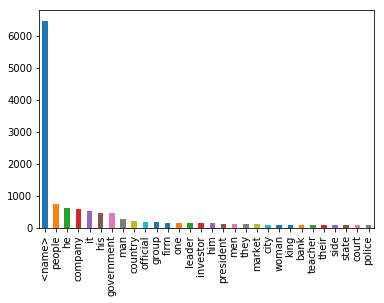

In [88]:
%matplotlib inline
df['sbj'].value_counts().head(30).plot('bar')

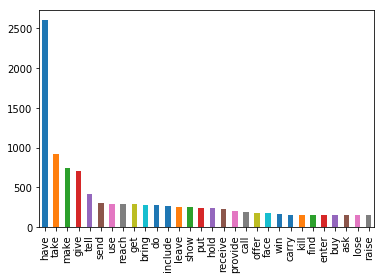

In [89]:
%matplotlib inline
df['verb'].value_counts().head(30).plot('bar')

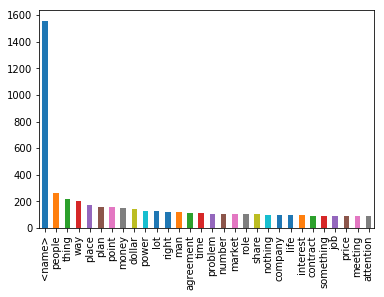

In [90]:
%matplotlib inline
df['dobj'].value_counts().head(30).plot('bar')

In [91]:
df.to_csv('output/ontonote-svo.txt', sep='\t', index=False, header=False)